# 기계학습기초 - 실습과제 5
# e비즈니스학과 201823871 박지헌

## wine 데이터셋을 활용하여 K-means를 수행하시오.
##### (["alcohol", "total_phenols"] feature 사용)

 1. Elbow point를 시각화하시오.

 2. silhouette diagram을 시각화하시오.

 3. 해당 결과를 토대로 optimal k를 제시하시오.


In [43]:
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

import numpy as np

In [2]:
dataset = load_wine(as_frame=True)

In [3]:
df = dataset.frame
df["class"] = dataset.target

<AxesSubplot:xlabel='alcohol', ylabel='total_phenols'>

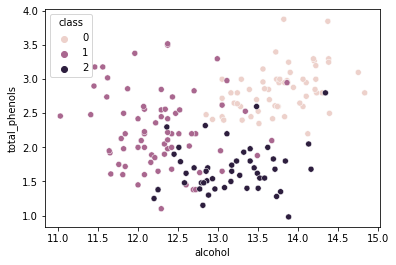

In [5]:
sns.scatterplot(data=df, x='alcohol', y='total_phenols',hue='class')

# 1. Elbow point를 시각화하시오.


In [34]:
X = df[["alcohol","total_phenols"]]
y = df['class']

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
y_pred = kmeans.predict(X)

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

58.398312169537604

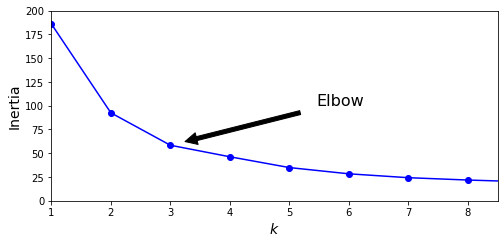

In [56]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 200])
plt.show()

# 2. silhouette diagram을 시각화하시오.


In [45]:
from sklearn.metrics import silhouette_score

In [47]:
silhouette_score(X, kmeans.labels_)

0.43919614923122996

In [48]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

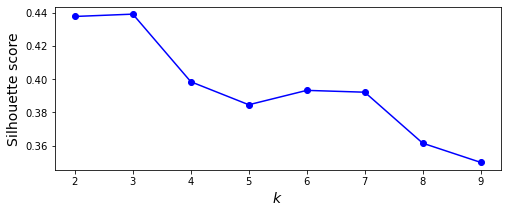

In [50]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [51]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
kmeans_per_k

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42)]

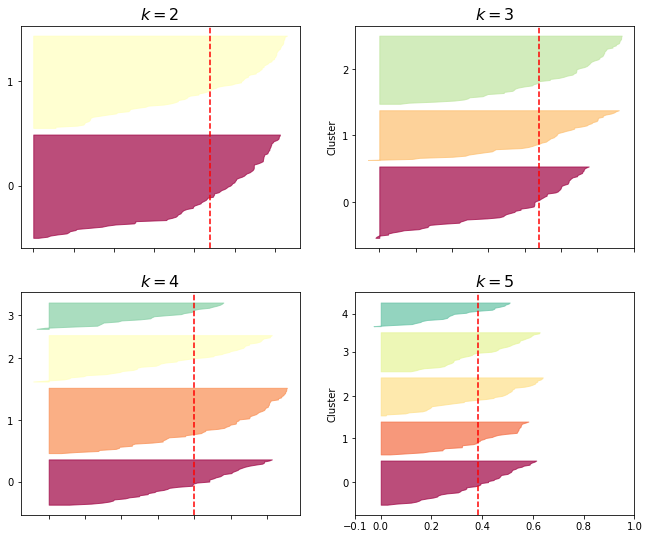

In [52]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k, n in zip((2, 3, 4, 5),(1,2,3,4)):
    plt.subplot(2, 2, n)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

# 3. 해당 결과를 토대로 optimal k를 제시하시오.

* elbow point = 3
* silhouette_score가 k = 3일 때, 가장 높다.
* silhouette diagram에서 k=3일떄, 샘플이 가장 고르게 분포된다.
> optimal k = **3**